# Model evaluation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', delimiter=',', names=[
    'Class',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalanity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline'])

df.head()

,Class,Alcohol,Malic acid,Ash,Alcalanity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

def compare_models(names, classifiers, X_train, X_test, y_train, y_test):
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
    
        print('Classifier: {}'.format(name))
        print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
        print('Confusion matrix: ')
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGnBu')
        plt.show()

        print('----------------------------------------------')

In [5]:
names = ['LDA', 'QDA', 'NB']
classifiers = [LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis(), GaussianNB()]

Classifier: LDA
Accuracy: 1.0
Confusion matrix: 


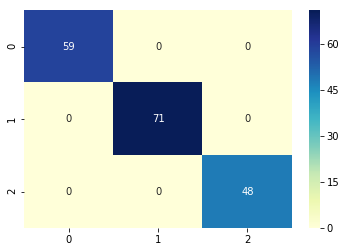

----------------------------------------------
Classifier: QDA
Accuracy: 0.9943820224719101
Confusion matrix: 


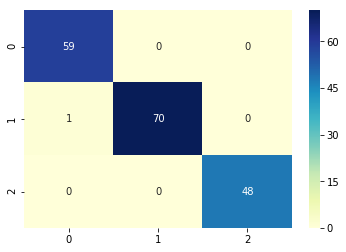

----------------------------------------------
Classifier: NB
Accuracy: 0.9887640449438202
Confusion matrix: 


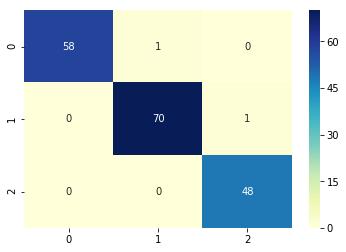

----------------------------------------------


In [6]:
compare_models(names, classifiers, X, X, y, y)

Classifier: LDA
Accuracy: 0.8089887640449438
Confusion matrix: 


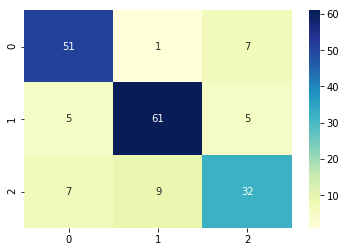

----------------------------------------------
Classifier: QDA
Accuracy: 0.8146067415730337
Confusion matrix: 


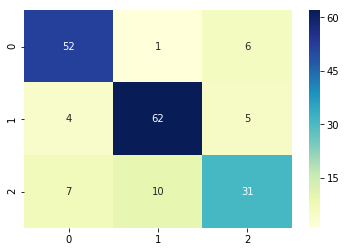

----------------------------------------------
Classifier: NB
Accuracy: 0.8089887640449438
Confusion matrix: 


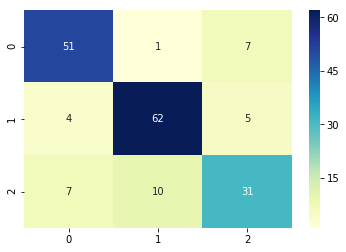

----------------------------------------------


In [7]:
X_two_features = df.iloc[:, 1:3].values
compare_models(names, classifiers, X_two_features, X_two_features, y, y)

Classifier: LDA
Accuracy: 0.8764044943820225
Confusion matrix: 


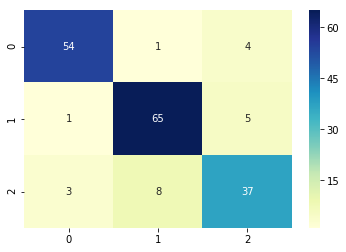

----------------------------------------------
Classifier: QDA
Accuracy: 0.8876404494382022
Confusion matrix: 


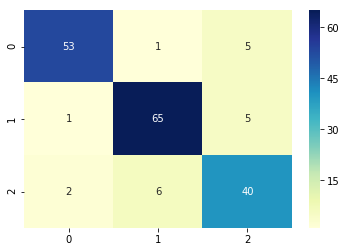

----------------------------------------------
Classifier: NB
Accuracy: 0.8539325842696629
Confusion matrix: 


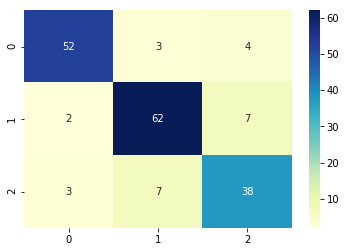

----------------------------------------------


In [8]:
X_five_features = df.iloc[:, 1:6]
compare_models(names, classifiers, X_five_features, X_five_features, y, y)

Classifier: LDA
Accuracy: 0.9887640449438202
Confusion matrix: 


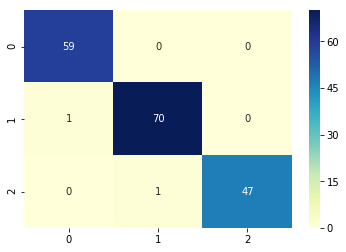

----------------------------------------------
Classifier: QDA
Accuracy: 0.9943820224719101
Confusion matrix: 


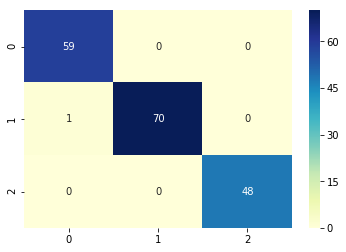

----------------------------------------------
Classifier: NB
Accuracy: 0.9606741573033708
Confusion matrix: 


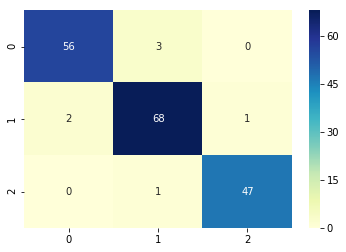

----------------------------------------------


In [9]:
X_ten_features = df.iloc[:, 1:11]
compare_models(names, classifiers, X_ten_features, X_ten_features, y, y)

Classifier: LDA
Accuracy: 0.8636363636363636
Confusion matrix: 


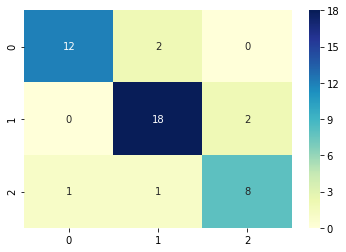

----------------------------------------------
Classifier: QDA
Accuracy: 0.7954545454545454
Confusion matrix: 


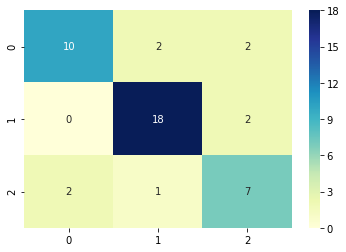

----------------------------------------------
Classifier: NB
Accuracy: 0.8181818181818182
Confusion matrix: 


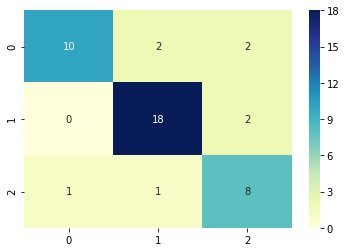

----------------------------------------------


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_two_features, y, test_size=0.25)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33)

compare_models(names, classifiers, X_train, X_val, y_train, y_val)

Accuracy: 0.7640449438202247
Confusion matrix: 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


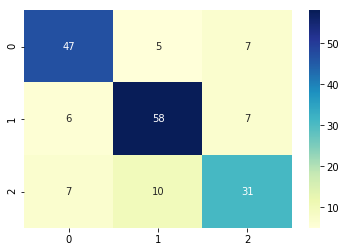

In [11]:
from sklearn.model_selection import cross_val_predict

lda = classifiers[0]
y_pred = cross_val_predict(lda, X_two_features, y, cv=10)
print('Accuracy: {}'.format(accuracy_score(y, y_pred)))
print('Confusion matrix: ')
sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap='YlGnBu')
plt.show()